<a href="https://colab.research.google.com/github/shan2312/Project-1/blob/master/Session%203/1st_DNN_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras
# Import Keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist
# Import necessary packages from keras. 

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Load MNIST data

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


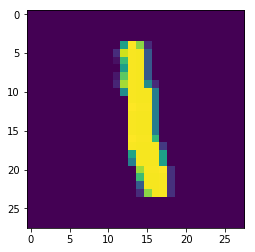

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[6])
# Plot one of the digits in the train data 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
# Reshape the data in order to include number of channels as well. Which is 1 in this case.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Convert data points to float and normalize so that values do not become too big.

In [0]:
y_train[:10]
# Print first 10 values of Y

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]
# Print Y after converting to a category

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
# Create a model object

# Add layer 1, output shape - (26,26). RF - 3
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
# Add drop out of 0.3. This will randomly deactivate 30% of neurons
model.add(Dropout(0.3))
# Add layer 2, output shape - (24,24). RF - 5
model.add(Convolution2D(32, 3, 3, activation='relu'))
# Batch normalization
model.add(BatchNormalization())
model.add(Dropout(0.3))
# Add a transition block, output shape - (12,12). RF - 10
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, 1, activation='relu'))

# Add layer 3, output shape - (12,12). RF - 12
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Dropout(0.3))
# Add layer 4, output shape - (10,10). RF - 14
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Add Max pooling layer, output shape - (5,5). RF - 28
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add layer 5, output shape - (3,3). RF - 30
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 2,2))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_la

In [0]:
model.summary()
# Modle summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_503 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_105 (Dropout)        (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_504 (Conv2D)          (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_104 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_106 (Dropout)        (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_505 (Conv2D)          (None, 12, 12, 10)        330       
__________

In [0]:
# Compile the model with important parameters
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,validation_data=(X_test,Y_test))
# Fit the CNN model

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
  320/60000 [..............................] - ETA: 33s - loss: 0.0215 - acc: 0.9938

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 33s 546us/step - loss: 0.0184 - acc: 0.9940 - val_loss: 0.0234 - val_acc: 0.9932
Epoch 2/30
60000/60000 [==============================] - 32s 536us/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0241 - val_acc: 0.9935
Epoch 3/30
60000/60000 [==============================] - 32s 527us/step - loss: 0.0182 - acc: 0.9940 - val_loss: 0.0274 - val_acc: 0.9922
Epoch 4/30
60000/60000 [==============================] - 31s 522us/step - loss: 0.0179 - acc: 0.9941 - val_loss: 0.0199 - val_acc: 0.9943
Epoch 5/30
60000/60000 [==============================] - 32s 526us/step - loss: 0.0185 - acc: 0.9939 - val_loss: 0.0271 - val_acc: 0.9921
Epoch 6/30
60000/60000 [==============================] - 31s 524us/step - loss: 0.0174 - acc: 0.9943 - val_loss: 0.0216 - val_acc: 0.9931
Epoch 7/30
60000/60000 [==============================] - 32s 541us/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0249 - val_acc: 0.9932
Epoch 8/30
60000/60000 [==============

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
# Evaluate the model

In [0]:
print(score)
# Print validation accuracy and loss

[0.022136983878070896, 0.9932]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.9157584e-10 1.2759808e-06 3.5985487e-08 5.9692589e-08 1.0508490e-12
  9.0018765e-12 1.7053677e-23 9.9999809e-01 5.0871379e-10 4.6623899e-07]
 [6.5298962e-09 2.7788087e-06 9.9999177e-01 1.0955951e-09 3.5795416e-09
  1.8445126e-10 5.4445263e-06 4.7597992e-10 5.2420073e-09 2.1051338e-10]
 [1.0364590e-08 9.9999988e-01 1.3025300e-08 1.1563488e-11 7.1014633e-10
  3.3360685e-09 2.5949717e-10 6.3955341e-08 6.1171903e-09 8.4590814e-11]
 [9.9998403e-01 2.8101547e-13 1.0587578e-10 1.1782794e-09 1.9662015e-10
  1.7033599e-09 1.5141678e-05 7.4810197e-10 1.3254513e-07 7.0513556e-07]
 [2.7553975e-09 2.4868063e-10 1.5977989e-08 5.7655315e-11 9.9985063e-01
  5.1395683e-09 1.1979820e-06 9.2525300e-07 5.2612572e-06 1.4193919e-04]
 [2.3212259e-09 9.9999988e-01 6.0982712e-09 5.9820334e-12 4.8737181e-10
  4.5742793e-10 1.1581307e-10 1.4621610e-07 9.2017158e-09 1.3273350e-10]
 [2.9178511e-09 9.7311909e-05 2.2192997e-07 7.8793966e-10 9.9879694e-01
  1.6161415e-07 4.0313089e-10 3.7903596e-06 1.0613549e-03 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
# create a dictionary of layer name and layer object as key and value

In [0]:
layer_dict

{'activation_58': <keras.layers.core.Activation at 0x7f8366441e80>,
 'batch_normalization_104': <keras.layers.normalization.BatchNormalization at 0x7f8366764be0>,
 'batch_normalization_105': <keras.layers.normalization.BatchNormalization at 0x7f83665e13c8>,
 'conv2d_503': <keras.layers.convolutional.Conv2D at 0x7f8366764278>,
 'conv2d_504': <keras.layers.convolutional.Conv2D at 0x7f8366764ba8>,
 'conv2d_505': <keras.layers.convolutional.Conv2D at 0x7f8366772b00>,
 'conv2d_506': <keras.layers.convolutional.Conv2D at 0x7f836672d5c0>,
 'conv2d_507': <keras.layers.convolutional.Conv2D at 0x7f836662a978>,
 'conv2d_508': <keras.layers.convolutional.Conv2D at 0x7f836658c518>,
 'conv2d_509': <keras.layers.convolutional.Conv2D at 0x7f8366514e80>,
 'dropout_105': <keras.layers.core.Dropout at 0x7f8366764860>,
 'dropout_106': <keras.layers.core.Dropout at 0x7f8366772978>,
 'dropout_107': <keras.layers.core.Dropout at 0x7f83666c5ef0>,
 'dropout_108': <keras.layers.core.Dropout at 0x7f83665faf98>,


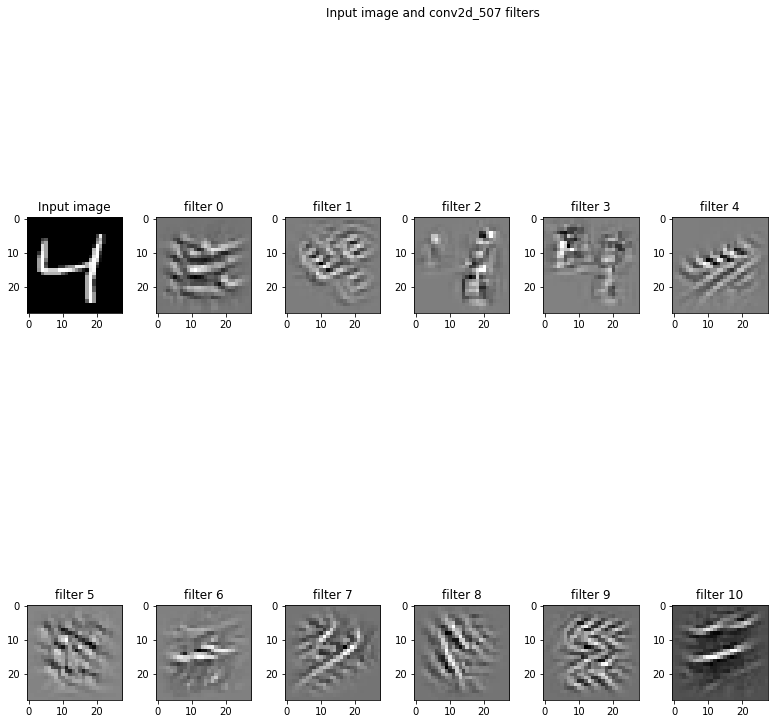

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_507'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()